In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(y_train)

60000

In [4]:
len(y_test)

10000

In [5]:
X_train[89].shape

(28, 28)

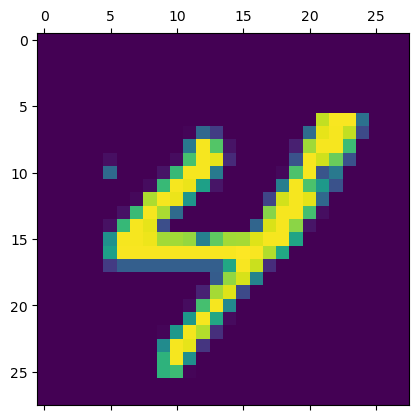

In [6]:
plt.matshow(X_train[89])

In [7]:
y_train[89]

4

In [8]:
X_train.shape

(60000, 28, 28)

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)
X_train_flattened.shape
X_test_flattened.shape

(10000, 784)

In [11]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation = 'sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 494us/step - loss: 0.4638 - accuracy: 0.8787
Epoch 2/10
1875/1875 [==============================] - 1s 483us/step - loss: 0.3042 - accuracy: 0.9150
Epoch 3/10
1875/1875 [==============================] - 1s 489us/step - loss: 0.2837 - accuracy: 0.9206
Epoch 4/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.2735 - accuracy: 0.9239
Epoch 5/10
1875/1875 [==============================] - 1s 498us/step - loss: 0.2671 - accuracy: 0.9253
Epoch 6/10
1875/1875 [==============================] - 1s 495us/step - loss: 0.2621 - accuracy: 0.9275
Epoch 7/10
1875/1875 [==============================] - 1s 481us/step - loss: 0.2581 - accuracy: 0.9288
Epoch 8/10
1875/1875 [==============================] - 1s 479us/step - loss: 0.2557 - accuracy: 0.9288
Epoch 9/10
1875/1875 [==============================] - 1s 479us/step - loss: 0.2531 - accuracy: 0.9297
Epoch 10/10
1875/1875 [==============================] - 1s 480u

In [12]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 426us/step - loss: 0.2637 - accuracy: 0.9268


[0.2636815309524536, 0.926800012588501]

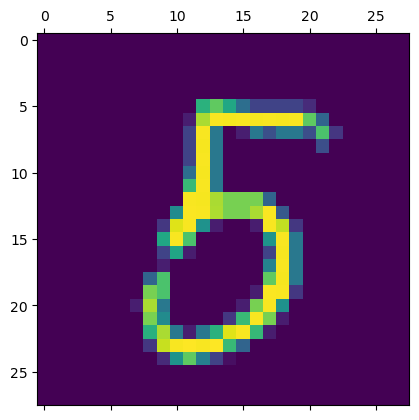

In [13]:
plt.matshow(X_test[45])

In [14]:
y_predicted = model.predict(X_test_flattened)
y_predicted[45]

313/313 [==============================] - 0s 374us/step


array([1.4709318e-01, 1.1423247e-04, 1.3849046e-02, 6.9346780e-01,
       4.2416729e-02, 9.9227476e-01, 3.5709029e-03, 1.3046390e-04,
       6.4045805e-01, 2.6239932e-01], dtype=float32)

In [15]:
np.argmax(y_predicted[45])

5

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[45]

5

In [17]:
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    2,    0,    5,    7,    3,    1,    0],
       [   0, 1110,    4,    2,    0,    1,    3,    2,   13,    0],
       [   4,    7,  931,   18,    7,    4,   10,    9,   39,    3],
       [   2,    0,   17,  926,    1,   26,    2,    9,   19,    8],
       [   1,    1,    5,    2,  928,    0,    6,    4,   10,   25],
       [   7,    2,    5,   37,    9,  780,    9,    9,   28,    6],
       [  10,    3,   11,    1,    7,   19,  902,    2,    3,    0],
       [   1,    6,   24,    5,    9,    1,    0,  946,    2,   34],
       [   5,    7,    6,   27,    9,   27,    7,    9,  868,    9],
       [  11,    7,    1,    9,   32,    7,    0,   19,    7,  916]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

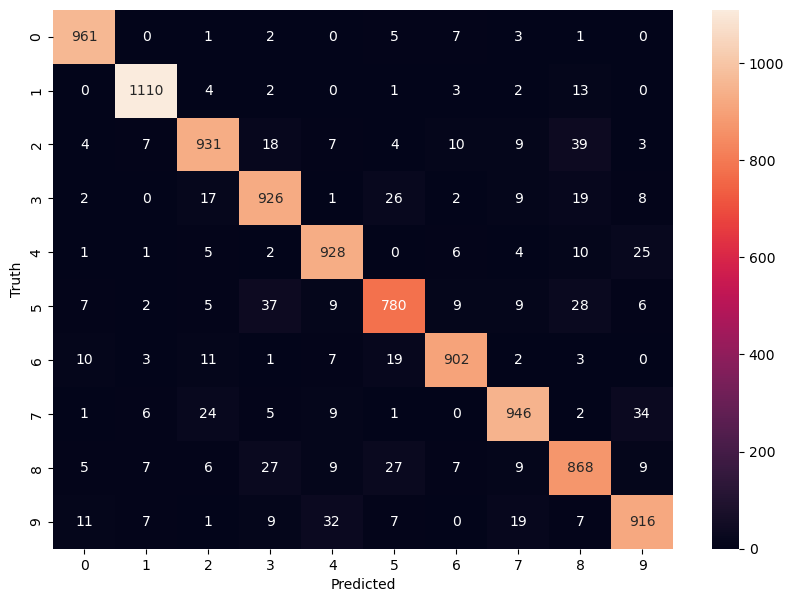

In [18]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# with Hidden Layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 689us/step - loss: 0.2761 - accuracy: 0.9207
Epoch 2/10
1875/1875 [==============================] - 1s 681us/step - loss: 0.1270 - accuracy: 0.9626
Epoch 3/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0890 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0661 - accuracy: 0.9801
Epoch 5/10
1875/1875 [==============================] - 1s 681us/step - loss: 0.0534 - accuracy: 0.9834
Epoch 6/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.0427 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 1s 676us/step - loss: 0.0358 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 1s 726us/step - loss: 0.0288 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 1s 677us/step - loss: 0.0248 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 1s 678u

In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 507us/step - loss: 0.0804 - accuracy: 0.9784


[0.08040755987167358, 0.9783999919891357]

313/313 [==============================] - 0s 454us/step


Text(95.72222222222221, 0.5, 'Truth')

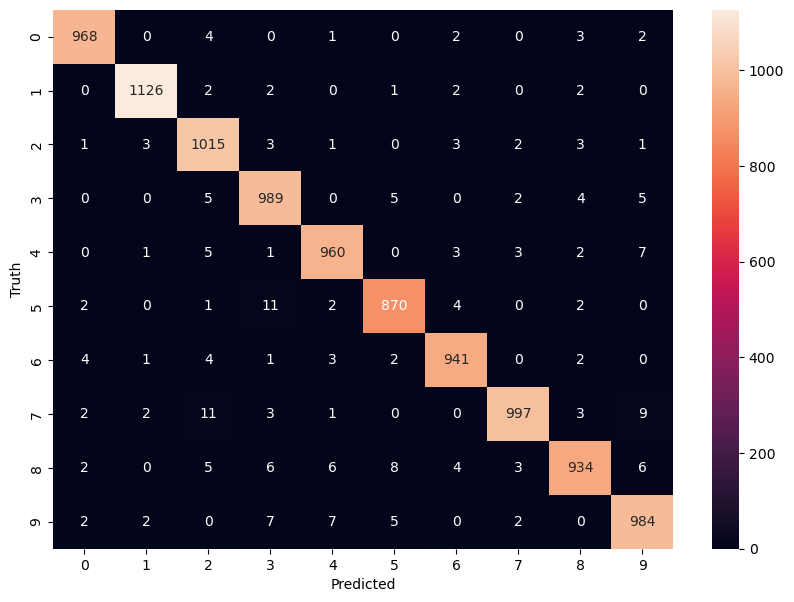

In [21]:
y_predicted = model.predict(X_test_flattened)

# convert into lables
y_predicted_labels = [np.argmax(i) for i in y_predicted]


# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)


# plot cm
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [23]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(125,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy'],
)

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 739us/step - loss: 0.2624 - accuracy: 0.9266
Epoch 2/10
1875/1875 [==============================] - 1s 730us/step - loss: 0.1178 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.0806 - accuracy: 0.9754
Epoch 4/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.0600 - accuracy: 0.9815
Epoch 5/10
1875/1875 [==============================] - 1s 745us/step - loss: 0.0455 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 1s 733us/step - loss: 0.0381 - accuracy: 0.9878
Epoch 7/10
1875/1875 [==============================] - 1s 735us/step - loss: 0.0300 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 2s 827us/step - loss: 0.0233 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 1s 774us/step - loss: 0.0196 - accuracy: 0.9939
Epoch 10/10
1875/1875 [==============================] - 1s 734u

In [24]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[45]

313/313 [==============================] - 0s 459us/step


5

313/313 [==============================] - 0s 462us/step


Text(95.72222222222221, 0.5, 'Truth')

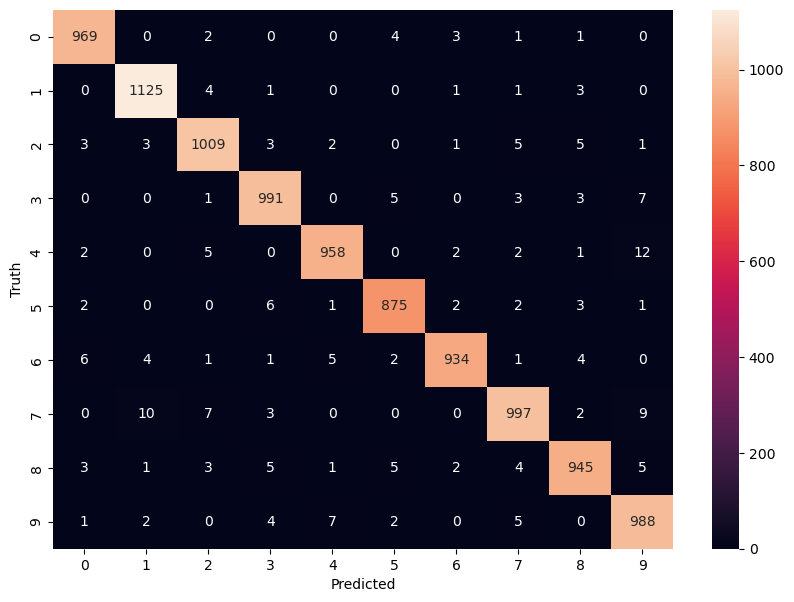

In [25]:
y_predicted = model.predict(X_test_flattened)

# convert into lables
y_predicted_labels = [np.argmax(i) for i in y_predicted]


# confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_predicted_labels)


# plot cm
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
